<a href="https://colab.research.google.com/github/saraswatnitin/CausalInferenceDiscoverywithML/blob/main/Analysis_of_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Target => Default on Payment (0 - Non Default , 1 - Default )
#Features => Mostly categorical in nature so encoding is required

In [2]:
#Import relevant libraries and read input data
import pandas as pd
import numpy as np

df = pd.read_csv('german_credit_data.csv')

In [4]:
df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [3]:
df.iloc[:, 3].value_counts()

A32    2650
A34    1465
A33     440
A31     245
A30     200
Name: Credit_History, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  5000 non-null   int64 
 1   Status_Checking_Acc          5000 non-null   object
 2   Duration_in_Months           5000 non-null   int64 
 3   Credit_History               5000 non-null   object
 4   Purposre_Credit_Taken        5000 non-null   object
 5   Credit_Amount                5000 non-null   int64 
 6   Savings_Acc                  5000 non-null   object
 7   Years_At_Present_Employment  5000 non-null   object
 8   Inst_Rt_Income               5000 non-null   int64 
 9   Marital_Status_Gender        5000 non-null   object
 10  Other_Debtors_Guarantors     5000 non-null   object
 11  Current_Address_Yrs          5000 non-null   int64 
 12  Property                     5000 non-null   object
 13  Age                          5000

In [6]:
#We identify what all categorical columns are there by searching for data type called object and encode them for building ML models . Why ?

categorical_columns = df.select_dtypes(include=['object']).columns
reference_features = []

for col in categorical_columns:
    reference_feature = df[col].dropna().unique()[0]
    reference_features.append(f"{col}:{reference_feature}")
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col, prefix_sep=':', drop_first=True)], axis=1)
    df = df.drop(col, axis=1)


In [7]:
len(reference_features) # There are total 13 categorical columns

13

In [8]:
df.head() #print forst 5 rows

,Customer_ID,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment,Count,...,Property:A124,Other_Inst_Plans :A142,Other_Inst_Plans :A143,Housing:A152,Housing:A153,Job:A172,Job:A173,Job:A174,Telephone:A192,Foreign_Worker:A202
0,100001,6,1169,4,4,67,2,1,0,1,...,0,0,1,1,0,0,1,0,1,0
1,100002,48,5951,2,2,22,1,1,0,1,...,0,0,1,1,0,0,1,0,0,0
2,100003,12,2096,2,3,49,1,2,0,1,...,0,0,1,1,0,1,0,0,0,0
3,100004,42,7882,2,4,45,1,2,0,1,...,0,0,1,0,1,0,1,0,0,0
4,100005,24,4870,3,4,53,2,2,1,1,...,1,0,1,0,1,0,1,0,0,0


In [9]:
#There is a variable called count , we will drop that
df.drop(['Count'], axis=1, inplace=True)

In [10]:
#set max columns to none so that all the columns are displayed
pd.set_option('display.max_columns', None)

In [11]:
df.head()

,Customer_ID,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment,Status_Checking_Acc:A12,Status_Checking_Acc:A13,Status_Checking_Acc:A14,Credit_History:A31,Credit_History:A32,Credit_History:A33,Credit_History:A34,Purposre_Credit_Taken:A41,Purposre_Credit_Taken:A410,Purposre_Credit_Taken:A42,Purposre_Credit_Taken:A43,Purposre_Credit_Taken:A44,Purposre_Credit_Taken:A45,Purposre_Credit_Taken:A46,Purposre_Credit_Taken:A48,Purposre_Credit_Taken:A49,Savings_Acc:A62,Savings_Acc:A63,Savings_Acc:A64,Savings_Acc:A65,Years_At_Present_Employment:A72,Years_At_Present_Employment:A73,Years_At_Present_Employment:A74,Years_At_Present_Employment:A75,Marital_Status_Gender:A92,Marital_Status_Gender:A93,Marital_Status_Gender:A94,Other_Debtors_Guarantors:A102,Other_Debtors_Guarantors:A103,Property:A122,Property:A123,Property:A124,Other_Inst_Plans :A142,Other_Inst_Plans :A143,Housing:A152,Housing:A153,Job:A172,Job:A173,Job:A174,Telephone:A192,Foreign_Worker:A202
0,100001,6,1169,4,4,67,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
1,100002,48,5951,2,2,22,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,100003,12,2096,2,3,49,1,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,100004,42,7882,2,4,45,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,100005,24,4870,3,4,53,2,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0


In [12]:
#Perform a train test split and segregate features and target variable in X & y  dataframes with random state for reproducibility

from sklearn.model_selection import train_test_split

# Drop reference categories
for ref in reference_features:
    col, cat = ref.split(':')
    if f"{col}:{cat}" in df.columns:
        df = df.drop(f"{col}:{cat}", axis=1)

# Separate features and target
X = df.drop('Default_On_Payment', axis=1)
y = df['Default_On_Payment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Since this is a Binary classification model we will use logistic regression as our  first approach

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression object with specified regularization
# Example: L2 regularization with a specific regularization strength
# Regularization is a techqniue that prevents overfitting  by adding a penalty term to the Cost function
# Penalty term maybe a L1(LASSO => Least Absolute Shrinkage & Selection Operator) -> type of regression that enhances prediction accuracy & interpretability of the model
# or
# L2(RIDGE =>  also called "Tikhonov regularization" named after Russian mathematician Tikhonov) and  is a type of regression that handles multicollinearity(independent variables are correlated) by adding

C_value = 1  # Inverse of regularization strength; smaller values specify stronger regularization

logreg = LogisticRegression(C=C_value, penalty='l1', solver='liblinear')
# Train the model
logreg.fit(X_train, y_train)


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [14]:
# The cost function in logistic regression, often referred to as the "log loss" or "binary cross-entropy loss,"
# measures the performance of the classification model. It's given by:

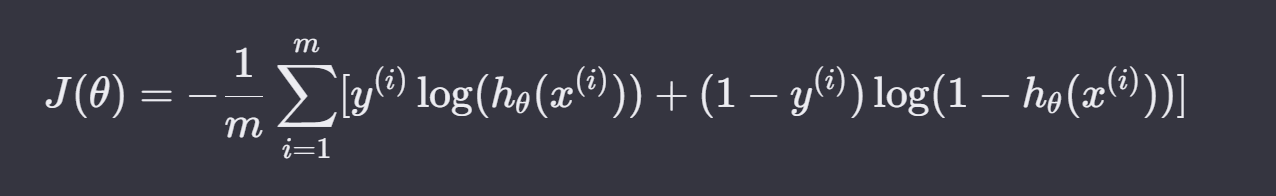

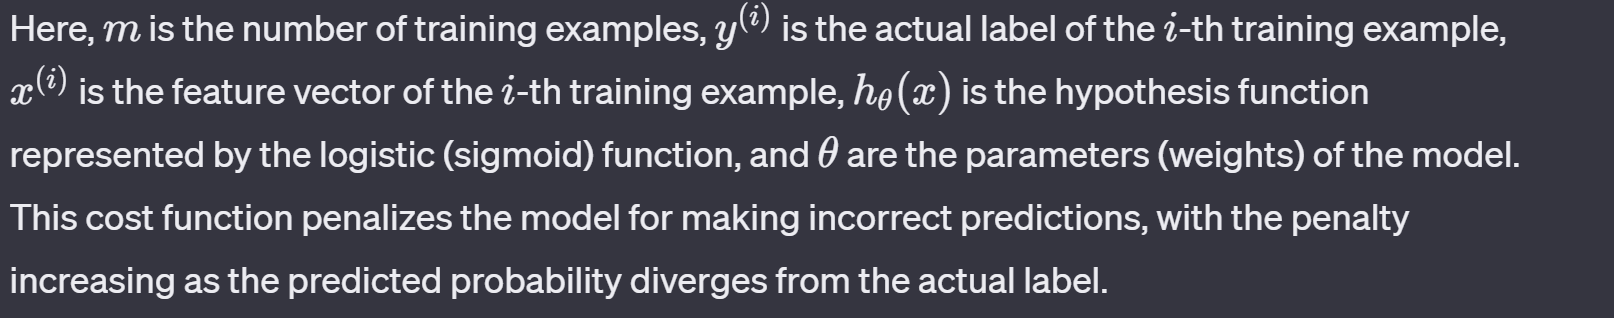

In [15]:
# Assess the model performance

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

# Predict on the test data
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Compute and print AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC: %.2f' % auc)

# Compute and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.4f' % accuracy)


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       689
           1       0.66      0.50      0.57       311

    accuracy                           0.76      1000
   macro avg       0.73      0.69      0.70      1000
weighted avg       0.75      0.76      0.75      1000

AUC: 0.80
Accuracy: 0.7640


In [ ]:
# To understand the performance of the model we need to primarily focus on 2 things -
# Confusion Matrix & Receiver Operating Characteristic Curve

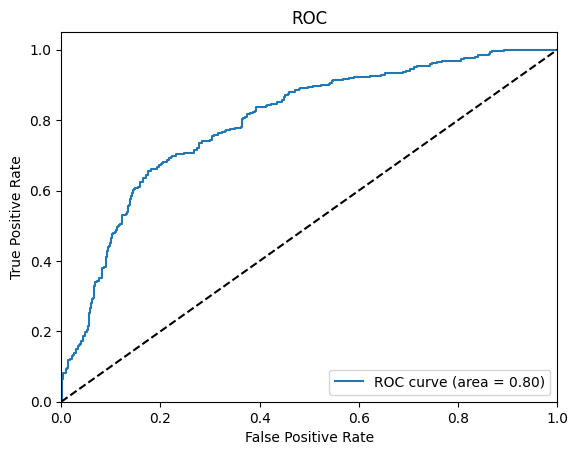

In [16]:
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## We will use k-fold cross validation
### Finding out best k for k-Fold Cross-validation

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Create a Logistic Regression object with specified parameters
logreg = LogisticRegression(C=1, penalty='l1', solver='liblinear')

# Range of fold values to try for cross-validation
cv_values = range(2, 11)  # From 2 to 10 folds

# Dictionary to hold the scores for each cv value
cv_scores = {}

# Evaluate the model for each fold value
for cv in cv_values:
    scores = cross_val_score(logreg, X_train, y_train, cv=cv, scoring='accuracy')
    cv_scores[cv] = scores.mean()

# Find the best number of folds
best_cv = max(cv_scores, key=cv_scores.get)
best_score = cv_scores[best_cv]

print(f"Best CV: {best_cv} with Accuracy: {best_score}")

# Fit the model with the best number of folds
logreg.fit(X_train, y_train)

# Compute Test Set Accuracy
accuracy = logreg.score(X_test, y_test)
print("Test Set Accuracy: ", accuracy)

# Predict probabilities for the test data
y_proba = logreg.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Compute AUROC
auroc = roc_auc_score(y_test, y_proba)
print("AUROC: ", auroc)


Best CV: 3 with Accuracy: 0.7705025956639084
Test Set Accuracy:  0.764
AUROC:  0.7962469490710709


# Now we will build the same model with Random Forest algorithm which falls in the class of Ensemble Learning using technique called Bootstrap Aggregation or Bagging
## Random Forest

In [20]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Random Forest parameters
n_estimators = 1000  # number of trees in the forest

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=n_estimators)

# Train the model
rf.fit(X_train, y_train)
# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
auroc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
report_rf = classification_report(y_test, y_pred_rf)

# Print metrics
print("Random Forest Evaluation")
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_score_rf)
print("AUROC:", auroc_rf)
print("Classification Report:\n", report_rf)


Random Forest Evaluation
Accuracy: 1.0
F1 Score: 1.0
AUROC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       689
           1       1.00      1.00      1.00       311

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



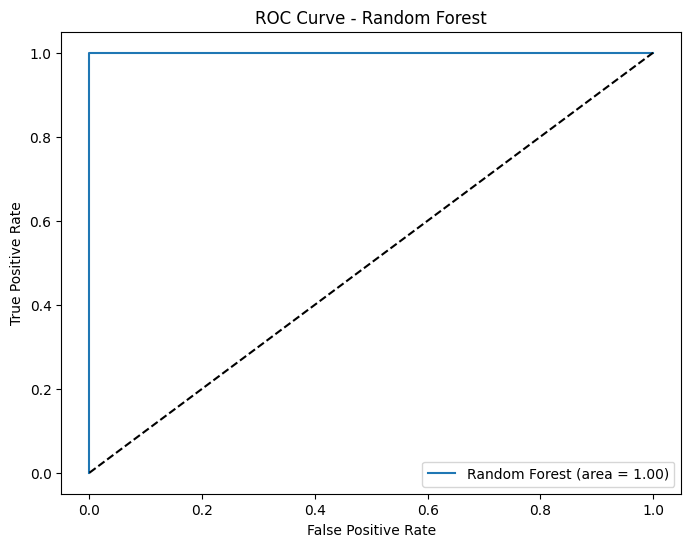

In [21]:
# Compute ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % auroc_rf)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


# XGBoost

## Random Forest uses the technique of bagging, which stands for Bootstrap Aggregating. In bagging, multiple decision trees are trained on different subsets of the training data, with each tree given a random sample of the data. This sampling is done with replacement, known as bootstrapping. The individual trees in a Random Forest run in parallel and do not influence each other. The final prediction is typically an average or majority vote from all the trees.

## This is different from boosting, where models (decision trees) are built sequentially, with each new model being trained to correct the errors made by the previous ones. Boosting techniques include algorithms like AdaBoost, Gradient Boosting Machines (GBM), and XGBoost. In these methods, trees are not independent of each other and build upon the previous trees to improve accuracy.

In [22]:
import xgboost as xgb

# XGBoost parameters
learning_rate = 0.1
n_estimators = 100

# Create XGBoost model
xg_reg = xgb.XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators)

# Train the model
xg_reg.fit(X_train, y_train)
# Predictions
y_pred_xgb = xg_reg.predict(X_test)

# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_score_xgb = f1_score(y_test, y_pred_xgb)
auroc_xgb = roc_auc_score(y_test, xg_reg.predict_proba(X_test)[:, 1])
report_xgb = classification_report(y_test, y_pred_xgb)

# Print metrics
print("XGBoost Evaluation")
print("Accuracy:", accuracy_xgb)
print("F1 Score:", f1_score_xgb)
print("AUROC:", auroc_xgb)
print("Classification Report:\n", report_xgb)


XGBoost Evaluation
Accuracy: 0.962
F1 Score: 0.9379084967320261
AUROC: 0.9940684808123988
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       689
           1       0.95      0.92      0.94       311

    accuracy                           0.96      1000
   macro avg       0.96      0.95      0.96      1000
weighted avg       0.96      0.96      0.96      1000



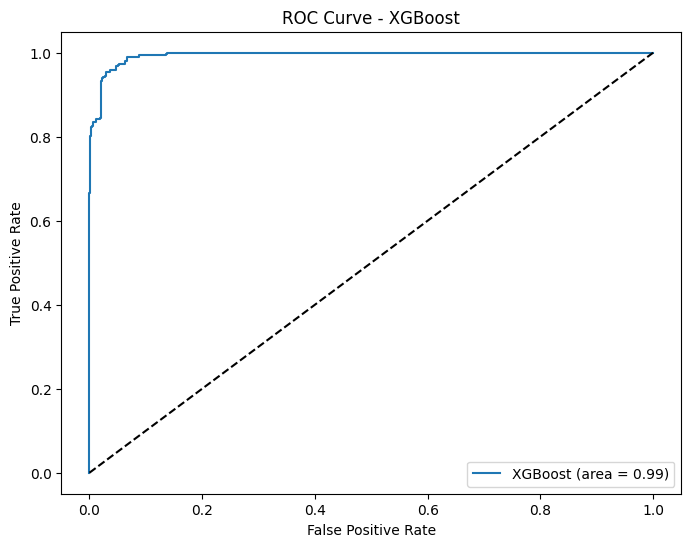

In [23]:
# Compute ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xg_reg.predict_proba(X_test)[:, 1])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (area = %0.2f)' % auroc_xgb)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()


## AdaBoost

In [24]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost parameters
n_estimators = 50
learning_rate = 1.0

# Create AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)

# Train the model
ada_clf.fit(X_train, y_train)
# Predictions
y_pred_ada = ada_clf.predict(X_test)

# Evaluation
accuracy_ada = accuracy_score(y_test, y_pred_ada)
f1_score_ada = f1_score(y_test, y_pred_ada)
auroc_ada = roc_auc_score(y_test, ada_clf.predict_proba(X_test)[:, 1])
report_ada = classification_report(y_test, y_pred_ada)

# Print metrics
print("AdaBoost Evaluation")
print("Accuracy:", accuracy_ada)
print("F1 Score:", f1_score_ada)
print("AUROC:", auroc_ada)
print("Classification Report:\n", report_ada)


AdaBoost Evaluation
Accuracy: 0.779
F1 Score: 0.5930018416206262
AUROC: 0.8187456540304929
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       689
           1       0.69      0.52      0.59       311

    accuracy                           0.78      1000
   macro avg       0.75      0.71      0.72      1000
weighted avg       0.77      0.78      0.77      1000



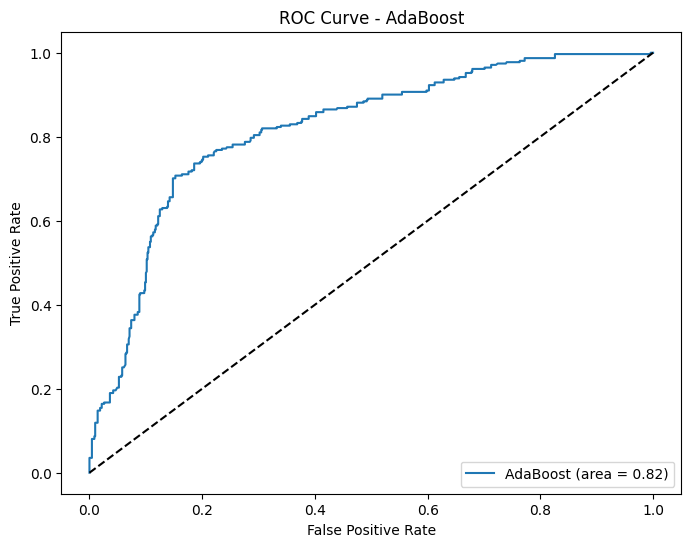

In [26]:
# Compute ROC curve
fpr_ada, tpr_ada, _ = roc_curve(y_test, ada_clf.predict_proba(X_test)[:, 1])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, label='AdaBoost (area = %0.2f)' % auroc_ada)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()
